<a href="https://colab.research.google.com/github/bibekuchiha/Data-Cleaning-with-Pandas/blob/master/Cleaning%20US%20Census%20Data/%20Cleaning_US_Census_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cleaning US Census Data

In [28]:
#Importing datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

Using glob, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame

In [29]:
us_census = glob.glob('states*.csv')
df_list = []
for filename in us_census:
  data = pd.read_csv(filename)
  df_list.append(data)

df = pd.concat(df_list)

df.head()


,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
1,1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,$76146.5605875153,1751607M_1841615F
2,2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,$61827.97663551402,448413M_478041F
3,3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,$75466.36363636363,306674M_340810F
4,4,Florida,19645772,21.3385426653884%,59.08374880153398%,15.165675934803444%,0.2104506232023015%,2.2831735378715257%,0.05151006711409391%,$50690.194986743794,9600009M_10045763F


In [30]:
#checking the columns in dataset
print(df.columns)

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')



Use regex to turn the Income column into a format that is ready for conversion into a numerical type.

In [31]:
df['Income'] = df.Income.replace('[/$]', '', regex=True)
df.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787164906,2648667M_2630239F
1,1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,76146.5605875153,1751607M_1841615F
2,2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,61827.97663551402,448413M_478041F
3,3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,75466.36363636363,306674M_340810F
4,4,Florida,19645772,21.3385426653884%,59.08374880153398%,15.165675934803444%,0.2104506232023015%,2.2831735378715257%,0.05151006711409391%,50690.194986743794,9600009M_10045763F


In [32]:
#converting the income column into numeric value
df.Income = pd.to_numeric(df.Income)
print(df.dtypes)

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income        float64
GenderPop      object
dtype: object


Look at the GenderPop column. We are going to want to separate this into two columns, the Men column, and the Women column.

In [33]:
gender_split = df.GenderPop.str.split('_')
df['Men'] = gender_split.str.get(0)
df['Women'] = gender_split.str.get(1)

There is still an M or an F character in each entry! We should remove those before we convert.

In [34]:
df['Men'] = df.Men.str[:-1]
df['Women'] = df.Women.str[:-1]
df.Men = pd.to_numeric(df.Men)
df.Women = pd.to_numeric(df.Women)
df.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787,2648667M_2630239F,2648667,2630239.0
1,1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,76146.560588,1751607M_1841615F,1751607,1841615.0
2,2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,61827.976636,448413M_478041F,448413,478041.0
3,3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,75466.363636,306674M_340810F,306674,340810.0
4,4,Florida,19645772,21.3385426653884%,59.08374880153398%,15.165675934803444%,0.2104506232023015%,2.2831735378715257%,0.05151006711409391%,50690.194987,9600009M_10045763F,9600009,10045763.0


In [35]:
#checking duplicates in state column
duplicates = df.duplicated(subset=['State'])
print(duplicates.value_counts())
#Drop those duplicates 
df = df.drop_duplicates()

False    51
True      9
dtype: int64


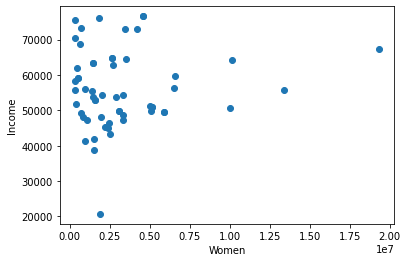

In [36]:
plt.scatter(df.Women, df.Income)
plt.xlabel('Women')
plt.ylabel('Income')
plt.show() 

In [37]:
print(df.columns)


Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop', 'Men', 'Women'],
      dtype='object')


In [38]:
#removing % sign and converting columns into numeric value
df['Hispanic'] = df.Hispanic.str[:-1]
df['Hispanic'] = pd.to_numeric(df.Hispanic)
df['White'] = df.White.str[:-1]
df['White'] = pd.to_numeric(df.White)
df['Black'] = df.Black.str[:-1]
df['Black'] = pd.to_numeric(df.Black)
df['Native'] = df.Native.str[:-1]
df['Native'] = pd.to_numeric(df.Native)
df['Asian'] = df.Asian.str[:-1]
df['Asian'] = pd.to_numeric(df.Asian)
df['Pacific'] = df.Pacific.str[:-1]
df['Pacific'] = pd.to_numeric(df.Pacific)

df = df.fillna(value={
'Hispanic': df.Hispanic.mean(),
'White': df.White.mean(),
'Black': df.Black.mean(),
'Native': df.Native.mean(),
'Asian': df.Asian.mean(),
'Pacific': df.Pacific.mean(),
})

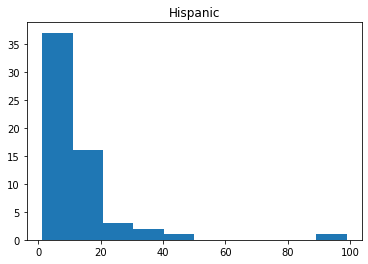

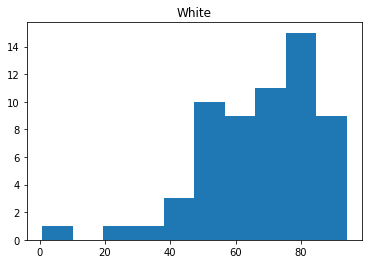

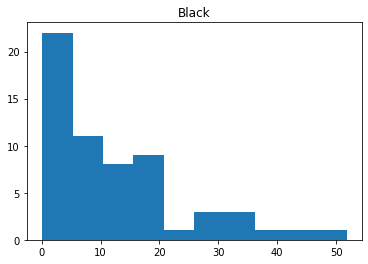

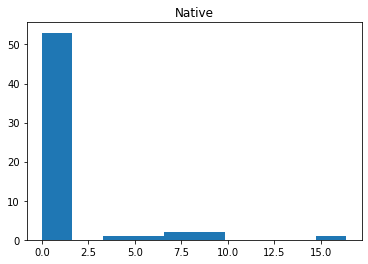

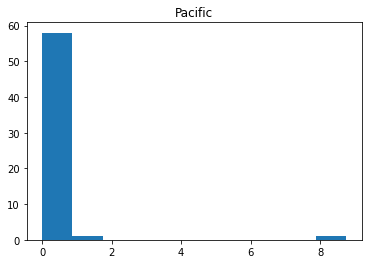

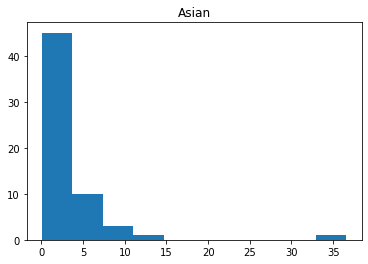

In [41]:

plt.hist(df['Hispanic'])
plt.title('Hispanic')
plt.show()
plt.hist(df['White'])
plt.title('White')
plt.show()
plt.cla()

plt.hist(df['Black'])
plt.title('Black')
plt.show()
plt.cla()

plt.hist(df['Native'])
plt.title('Native')
plt.show()
plt.cla()

plt.hist(df['Pacific'])
plt.title('Pacific')
plt.show()
plt.cla()

plt.hist(df['Asian'])
plt.title('Asian')
plt.show()



In [42]:
print(df.head())
print(df.dtypes)

   Unnamed: 0                 State  ...      Men       Women
0           0              Colorado  ...  2648667   2630239.0
1           1           Connecticut  ...  1751607   1841615.0
2           2              Delaware  ...   448413    478041.0
3           3  District of Columbia  ...   306674    340810.0
4           4               Florida  ...  9600009  10045763.0

[5 rows x 13 columns]
Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic      float64
White         float64
Black         float64
Native        float64
Asian         float64
Pacific       float64
Income        float64
GenderPop      object
Men             int64
Women         float64
dtype: object
